## Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

## Load Dataset


In [4]:
df= pd.read_csv("../data/bank_data_C.csv")

In [5]:
df.shape

(1041614, 9)

In [6]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## Descriptive Statistics of Dataset

In [8]:
df.describe(include = "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [9]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [11]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [12]:
df.head(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0


## Data Cleaning and Feature Engineering 

In [14]:
## Convert DOB and Transaction Date to Datetime Object
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], format= "%d/%m/%y")


/var/folders/d0/r91xzdy17hg7htqwyfclftqh0000gn/T/ipykernel_23865/1402487126.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])


In [15]:
df["TransactionDate"].unique()

<DatetimeArray>
['2016-08-02 00:00:00', '2016-08-01 00:00:00', '2016-08-03 00:00:00',
 '2016-08-05 00:00:00', '2016-08-04 00:00:00', '2016-08-06 00:00:00',
 '2016-08-09 00:00:00', '2016-08-08 00:00:00', '2016-08-12 00:00:00',
 '2016-08-07 00:00:00', '2016-10-21 00:00:00', '2016-10-16 00:00:00',
 '2016-08-10 00:00:00', '2016-08-14 00:00:00', '2016-08-17 00:00:00',
 '2016-08-21 00:00:00', '2016-08-19 00:00:00', '2016-08-24 00:00:00',
 '2016-08-22 00:00:00', '2016-08-29 00:00:00', '2016-08-31 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-08-13 00:00:00',
 '2016-08-25 00:00:00', '2016-08-28 00:00:00', '2016-08-15 00:00:00',
 '2016-08-27 00:00:00', '2016-08-20 00:00:00', '2016-08-23 00:00:00',
 '2016-08-30 00:00:00', '2016-08-11 00:00:00', '2016-08-16 00:00:00',
 '2016-08-26 00:00:00', '2016-09-27 00:00:00', '2016-08-18 00:00:00',
 '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-30 00:00:00',
 '2016-09-03 00:00:00', '2016-09-02 00:00:00', '2016-09-01 00:00:00',
 '20

**Create a new column for customer age**


In [17]:
#write a function to create age and create a new column for age 
def calculate_age(df):
    # Subtract year of birth from transaction year
    df["age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
    return df


In [18]:
df = calculate_age(df)

In [19]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**Observe and correct customer with negative age values**

In [21]:
df[df["age"] <= 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [22]:
def adjust_year(date):
    if pd.notnull(date) and date.year > 2016:
        return date.replace(year=date.year - 100)
    return date

In [23]:
df["CustomerDOB"] = df["CustomerDOB"].apply(adjust_year)

In [24]:
df = calculate_age(df)

In [25]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


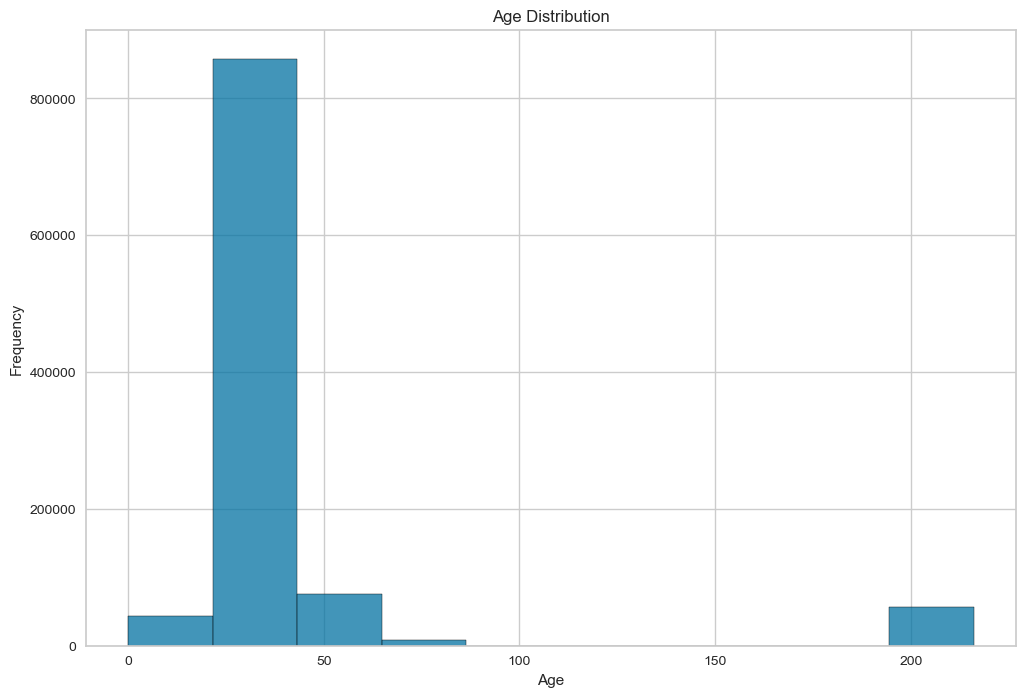

In [26]:
## Observing the age distribution 
# Plotting Age Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df["age"], bins=10, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()


In [27]:
df[df["age"] > 100]["CustomerDOB"].unique()

<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [28]:
## Define functions to replace outliers in ages 
def replace_age_outlier(df):
    DOB_threshold = 1900

    # Find rows where year of birth is less than the threshold
    age_outliers = df[df["CustomerDOB"].dt.year < DOB_threshold].index

    # Calculate the mean of valid DOBs
    mean_DOB = df.loc[~df.index.isin(age_outliers), "CustomerDOB"].mean()

    # Replace outlier DOBs with the mean DOB
    df.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return df

In [29]:
# Fix any age outliers
df = replace_age_outlier(df)

# Recalculate age after fixing DOBs
df = calculate_age(df)


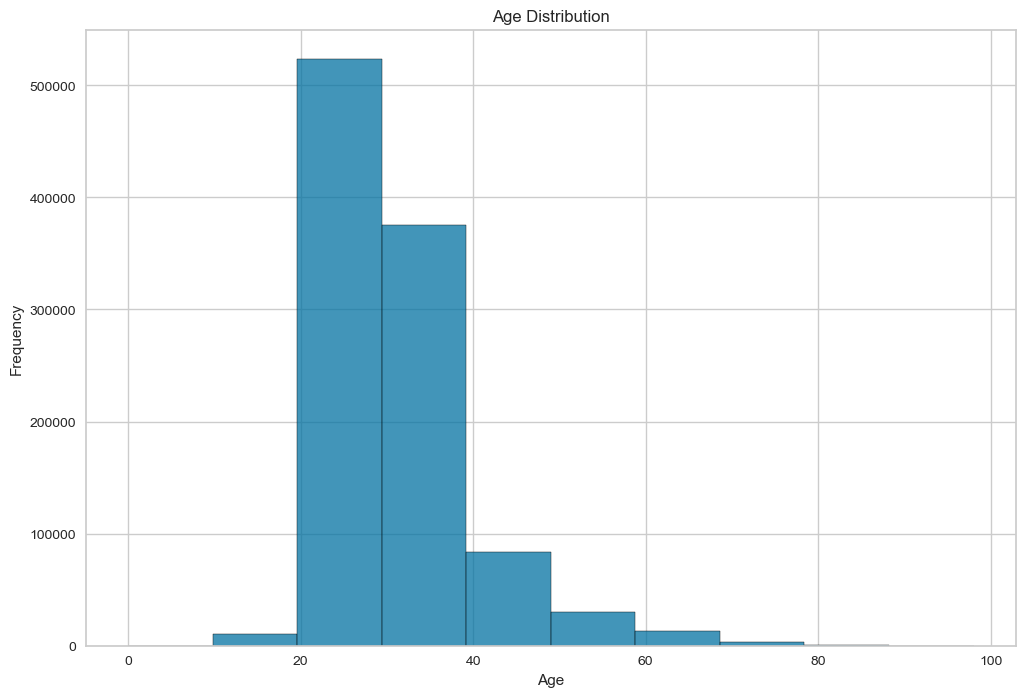

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df["age"], bins=10, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

**Gender Distribution**

In [32]:
df["CustGender"].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [33]:
#Replace T in Gender with M
df["CustGender"] = df["CustGender"].replace('T','M')

In [34]:
df["CustGender"].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

**Location**

In [36]:
df["CustLocation"].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

**Account Balance**

In [38]:
df["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

**Transaction amount**

In [40]:
df["TransactionAmount (INR)"].sort_values(ascending = True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [41]:
## locate and drop all customers with 0 transaction amount 
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

820

In [42]:
df.drop(df[df["TransactionAmount (INR)"] == 0].index, axis=0, inplace=True)

In [43]:
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

0

In [44]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Exploratory Data Analysis

In [46]:
df["CustomerID"].nunique()

878763

In [47]:
df.shape

(1040794, 10)

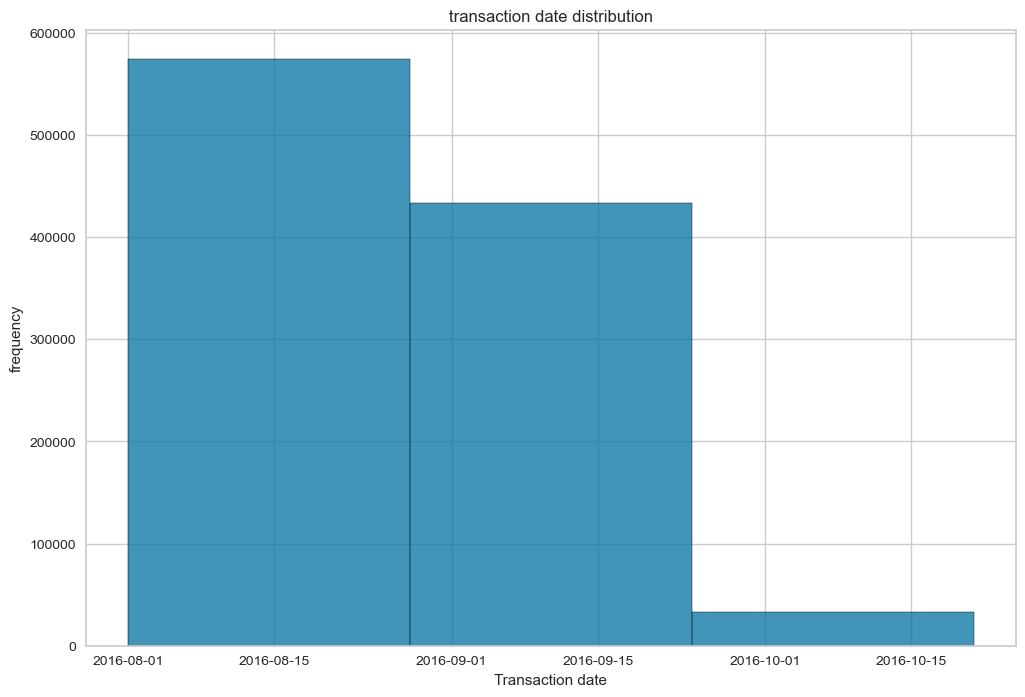

In [48]:
#Plot a distribution for data accross the unique transaction date
plt.figure(figsize=(12,8))
sns.histplot(df["TransactionDate"],bins=3,kde=False)
plt.xlabel("Transaction date")
plt.ylabel("frequency")
plt.title("transaction date distribution")
plt.show()

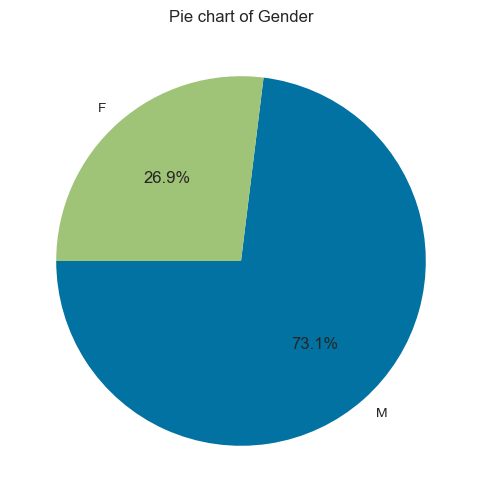

In [49]:
#Create a pie chart for gender frequency

plt.figure(figsize=(6,6))
gender_count = df["CustGender"].value_counts()
plt.pie(gender_count,labels = gender_count.index, autopct="%1.1f%%", startangle=180)
plt.title("Pie chart of Gender")
plt.show()

## RFM Analysis

In [51]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20


## Recency

In [53]:
day = df["TransactionDate"].max()

In [54]:
day

Timestamp('2016-10-21 00:00:00')

In [55]:
recency = df.groupby(["CustomerID"]).agg({"TransactionDate": lambda x: ((day - x.max()).days+1)})

In [56]:
recency.head()

,TransactionDate
CustomerID,
C1010011,26
C1010012,69
C1010014,76
C1010018,37
C1010024,65


## Frequency

In [58]:
frequency = df.drop_duplicates(subset="TransactionID").groupby(["CustomerID"])[["TransactionID"]].count()

In [59]:
frequency.head()

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


## Monetary

In [61]:
monetary = df.groupby("CustomerID")[["TransactionAmount (INR)"]].sum()

In [62]:
monetary.head()

,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


## Create RFM Table

In [64]:
RFM_table =pd.concat([recency,frequency,monetary], axis = 1)

In [65]:
RFM_table.head()

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [66]:
RFM_table = RFM_table.rename(columns = {"TransactionDate":"recency", "TransactionID":"frequency","TransactionAmount (INR)":"monetary"})

In [67]:
RFM_table.head()

,recency,frequency,monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


## Explore RFM table

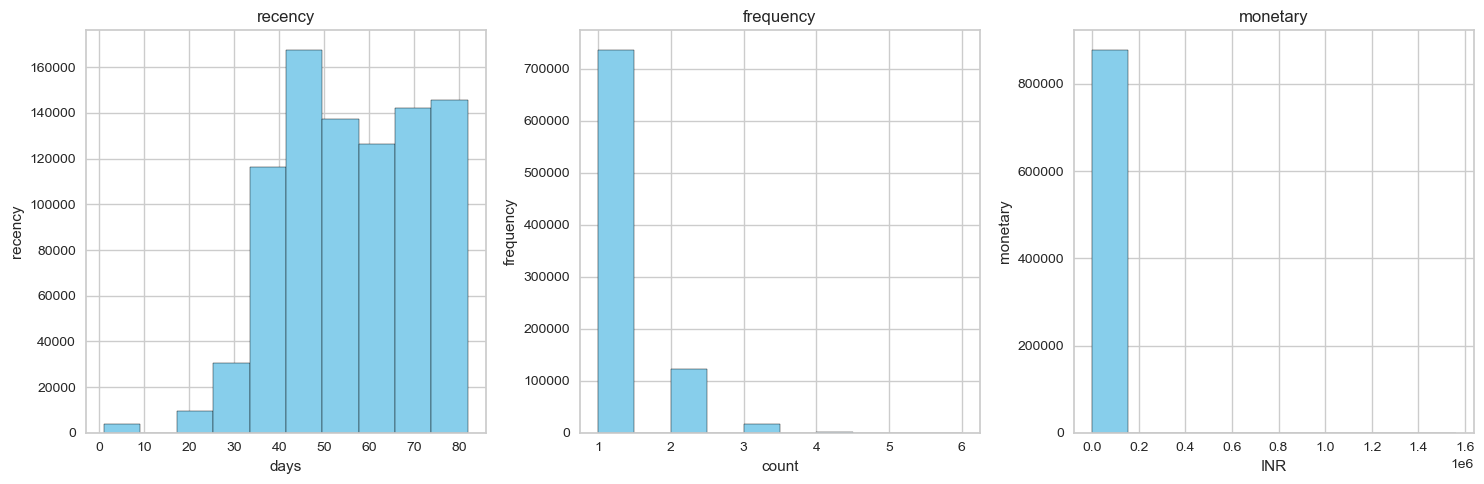

In [69]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
columns = ["recency", "frequency", "monetary"]
for i, col in enumerate(columns):
    # Fixed indentation for the block inside the for loop
    axes[i].hist(RFM_table[col], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("days" if col == "recency" else "count" if col == "frequency" else "INR")  # Fixed typo in "frequency" and added missing closing parenthesis
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()



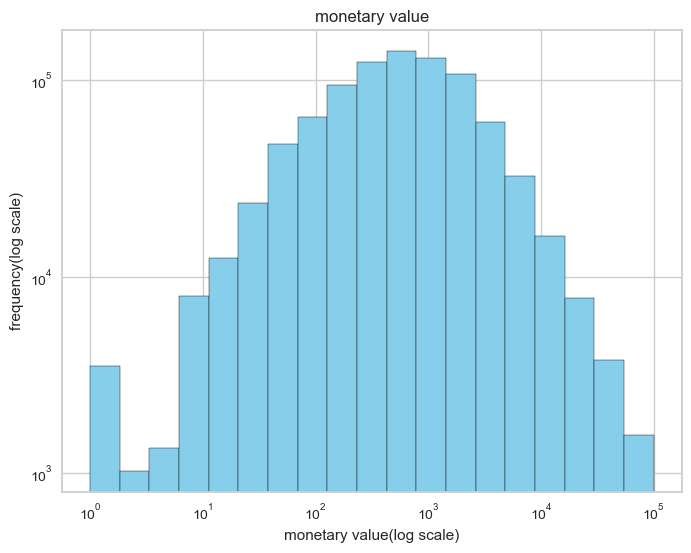

In [70]:
plt.figure(figsize=(8, 6))  
plt.hist(RFM_table["monetary"], bins=np.logspace(0, 5, 20), color="skyblue", edgecolor="black")
plt.title("monetary value")
plt.xlabel("monetary value(log scale)")
plt.ylabel("frequency(log scale)")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [71]:
RFM_table.corr()

,recency,frequency,monetary
recency,1.000000,-0.223293,-0.020675
frequency,-0.223293,1.000000,0.097491
monetary,-0.020675,0.097491,1.000000


# Assign RFM score

In [73]:
RFM_table.head()

,recency,frequency,monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [74]:
#calculate the quartile for each column 
quantile = RFM_table[['recency','frequency','monetary']].quantile(q= [0.25,0.5,0.75]).to_dict()

In [75]:
quantile

{'recency': {0.25: 44.0, 0.5: 56.0, 0.75: 69.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [76]:
RFM_table["frequency"].value_counts()

frequency
1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: count, dtype: int64

In [77]:
def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.5]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 2
    else: 
        return 1

def assign_M_score(x, feature):
  if x <= quantile[feature][0.25]:
    return 1
  elif x <= quantile[feature][0.5]:
    return 2
  elif x <= quantile[feature][0.75]:
   return 3
  else:
    return 4

def custom_frequency_score (x):
   if x <= 3:
    return x
   else:
       return 4


In [78]:
RFM_table["R_score"] = RFM_table["recency"].apply(lambda x: assign_R_score(x, "recency"))
RFM_table["F_score"] = RFM_table["frequency"].apply(custom_frequency_score)                                               
RFM_table["M_score"] = RFM_table["monetary"].apply(lambda x: assign_M_score(x, "monetary"))
                                                  

In [79]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score
CustomerID,,,,,,
C1010011,26,2,5106.0,4,2,4
C1010012,69,1,1499.0,2,1,3
C1010014,76,2,1455.0,1,2,3
C1010018,37,1,30.0,4,1,1
C1010024,65,1,5000.0,2,1,4


In [80]:
#create total RFM score 
RFM_table["RFM_score"]= RFM_table[["R_score","F_score","M_score"]].sum(axis = 1)

In [81]:
#create total RFM score
RFM_table["RFM_group"]= RFM_table["R_score"].astype(str)+ RFM_table["F_score"].astype(str)+RFM_table["M_score"].astype(str)

In [82]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424
C1010012,69,1,1499.0,2,1,3,6,213
C1010014,76,2,1455.0,1,2,3,6,123
C1010018,37,1,30.0,4,1,1,6,411
C1010024,65,1,5000.0,2,1,4,7,214


<Axes: xlabel='RFM_score', ylabel='count'>

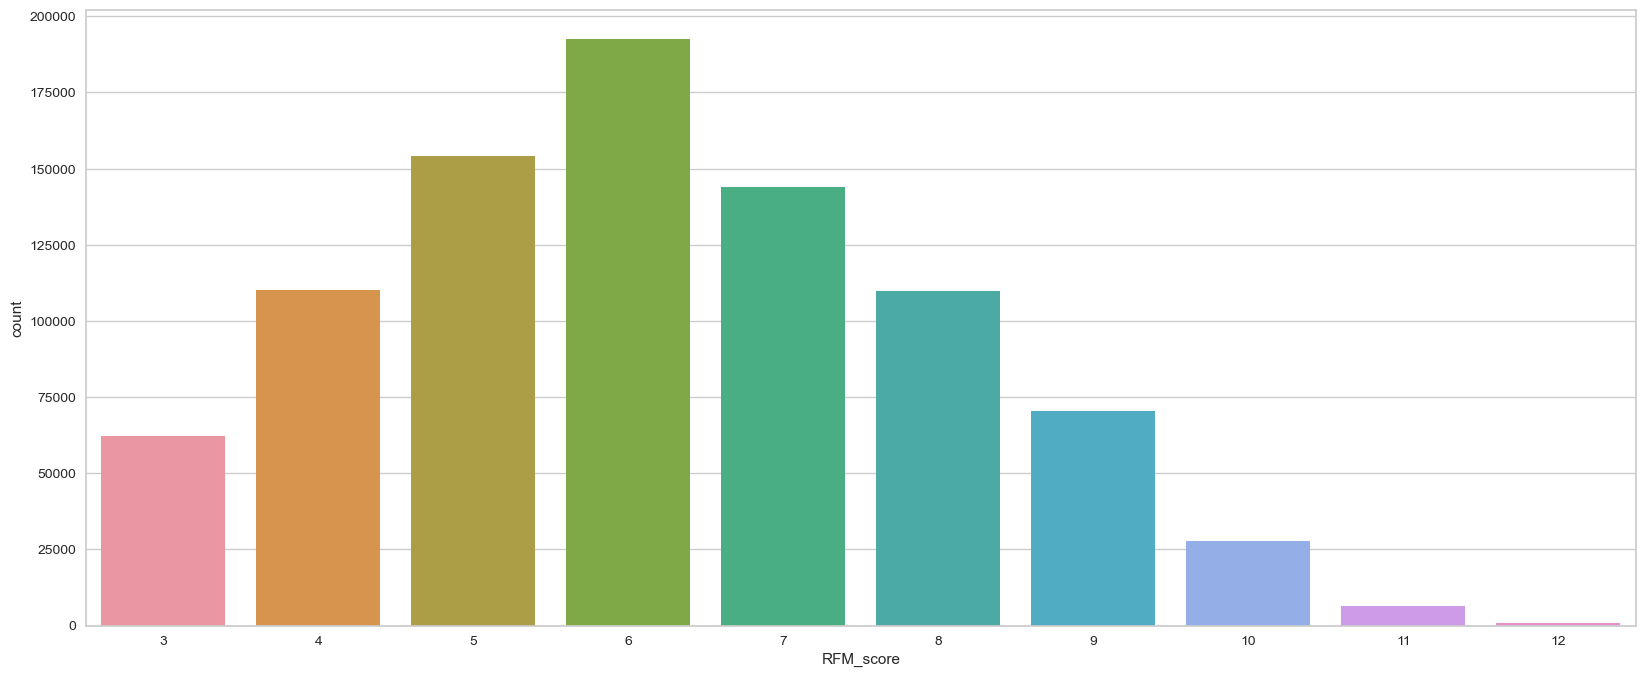

In [83]:
#Visualize RFM score
plt.figure(figsize = (20,8))
sns.countplot(x = RFM_table ["RFM_score"])

**12 - 10** for high valued  customere
**9 - 6** for Medium Valued Customers
**5 - 3** for low valued customers

In [85]:
def assign_segments(x):
    if x <= 5:
        return "low"
    elif x <= 9:
        return "medium"
    else:
        return "high"

In [86]:
RFM_table["segments"] = RFM_table["RFM_score"].apply(lambda x: assign_segments(x))

In [87]:
RFM_table.head(3)

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments
CustomerID,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high
C1010012,69,1,1499.0,2,1,3,6,213,medium
C1010014,76,2,1455.0,1,2,3,6,123,medium


**Distribution of segments of customers**

<Axes: xlabel='segments', ylabel='count'>

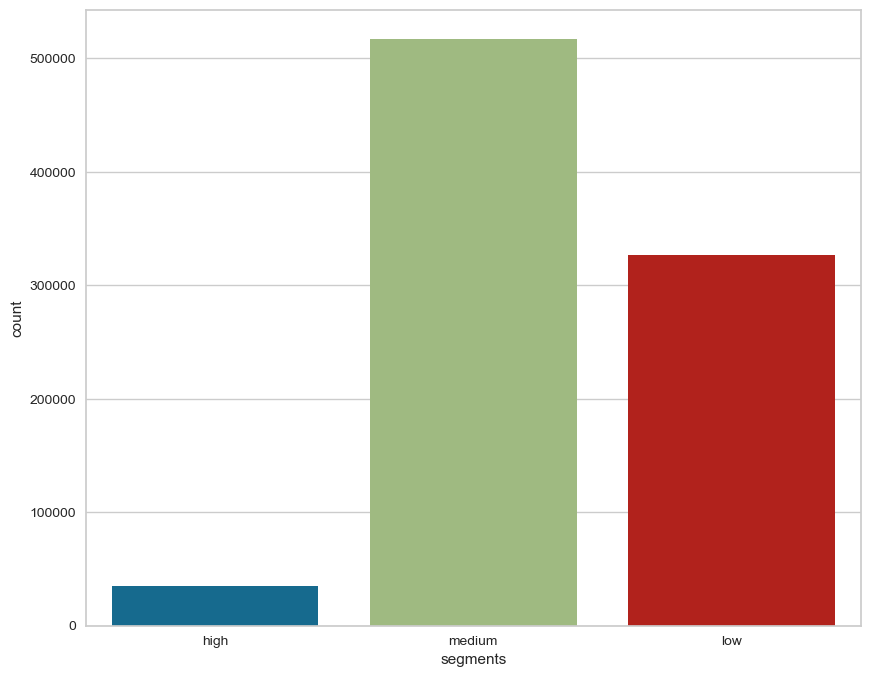

In [89]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["segments"])

**Create weighted RFM score**

In [91]:
RFM_table['weighted_score'] = (RFM_table['R_score'] * 2) + (RFM_table["F_score"] * 1) + (RFM_table['M_score'] * 1)

In [92]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments,weighted_score
CustomerID,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14
C1010012,69,1,1499.0,2,1,3,6,213,medium,8
C1010014,76,2,1455.0,1,2,3,6,123,medium,7
C1010018,37,1,30.0,4,1,1,6,411,medium,10
C1010024,65,1,5000.0,2,1,4,7,214,medium,9


<Axes: xlabel='weighted_score', ylabel='count'>

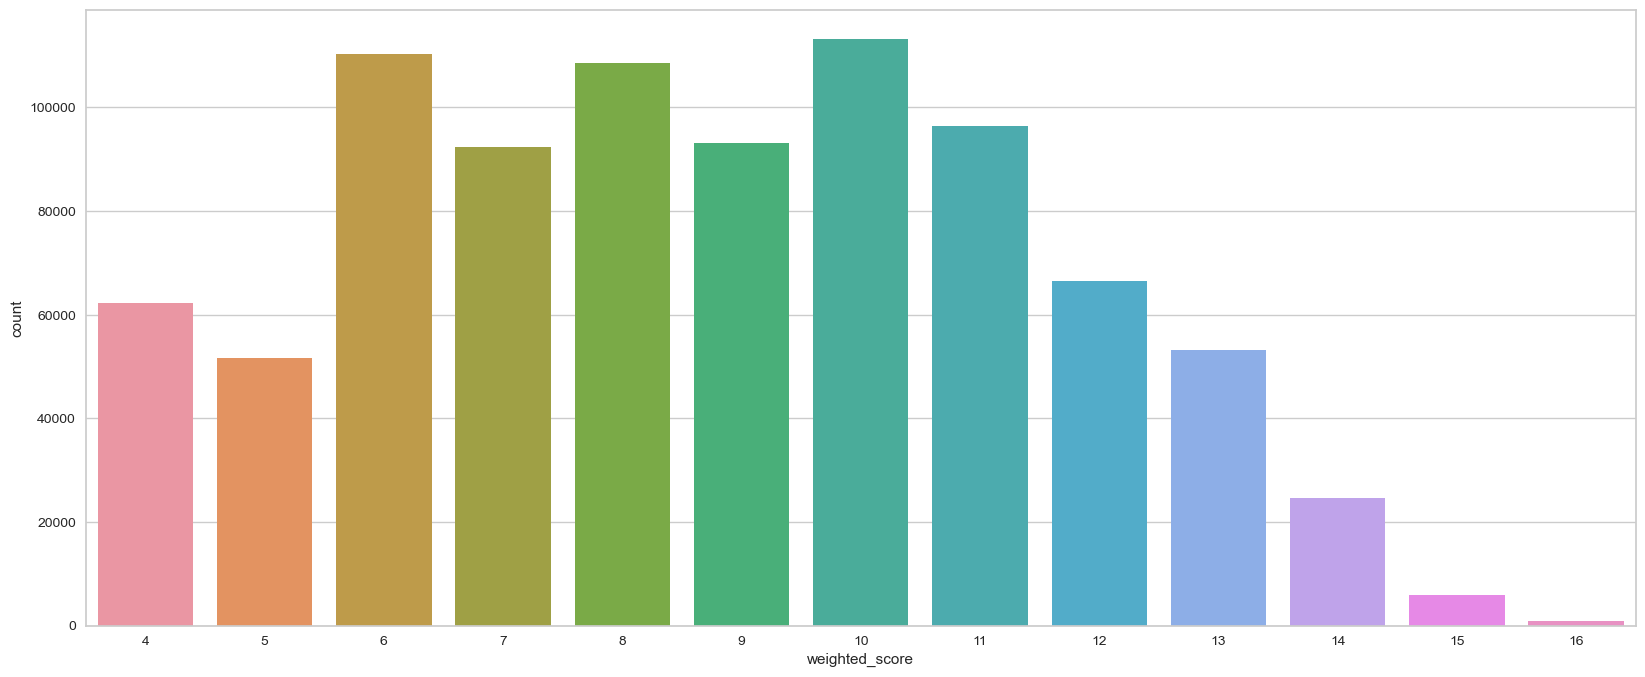

In [93]:
plt.figure(figsize = (20,8))
sns.countplot( x = RFM_table["weighted_score"])

In [94]:
RFM_table["weighted_segments"] = RFM_table["weighted_score"].apply(lambda x: assign_segments(x))

<Axes: xlabel='weighted_segments', ylabel='count'>

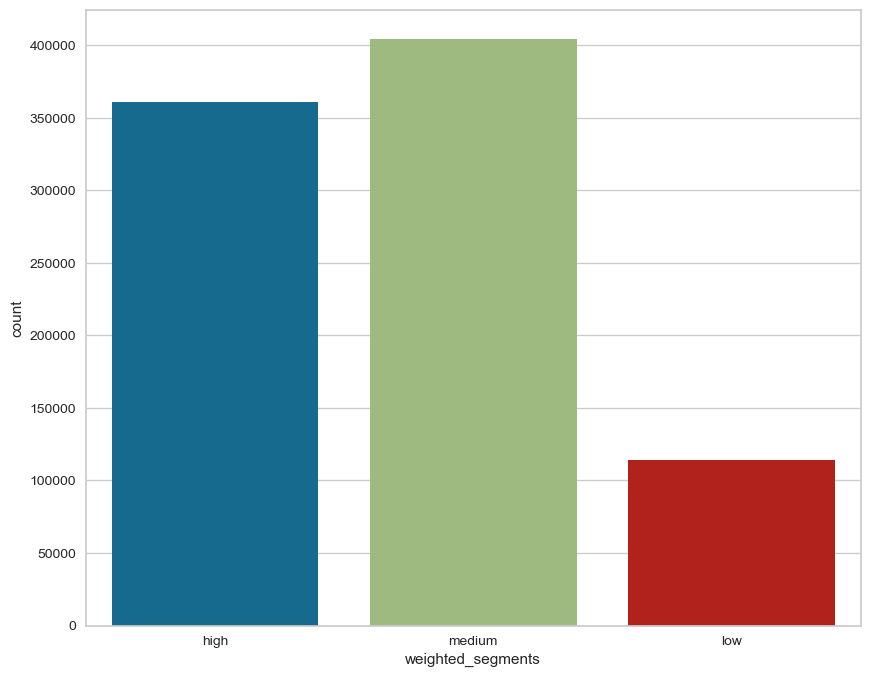

In [95]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["weighted_segments"])

# K-means Customer segmentation

Instead of segmenting customers based on total RFM score alone, we are going to utilize machine learning algorithm to discover unique clusters based on the underlying information from the RFM data.

••Instead of segmenting customers based on total RFM score alone, we are going to utilize machine learning algorithm to discover unique clusters based on the underlying information from the RFM data.

**Instead of segmenting customers based on total RFM score alone, we are going to utilize machine learning algorithm to discover unique clusters based on the underlying information from the RFM data**


**Create dataframe for k-means clustering**

In [143]:
RFM_df = RFM_table.drop(["RFM_group", "segments", "weighted_score", "weighted_segments"], axis = 1)
RFM_df.head(2)

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
C1010011,26,2,5106.0,4,2,4,10
C1010012,69,1,1499.0,2,1,3,6


**Implement standard scaling**

**Implement standard scaling**

In [145]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_df)

In [105]:
scaled_data

array([[-1.99039095,  1.8173276 ,  0.45193522, ...,  1.82368347,
         1.34172808,  2.0708205 ],
       [ 0.83352617, -0.41084172, -0.04969314, ..., -0.41175149,
         0.45881674, -0.10052404],
       [ 1.2932336 ,  1.8173276 , -0.05581225, ...,  1.82368347,
         0.45881674, -0.10052404],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734, ..., -0.41175149,
        -1.30700594, -1.18619632],
       [-0.08588871, -0.41084172, -0.25120672, ..., -0.41175149,
        -1.30700594, -0.64336018],
       [-1.92471846, -0.41084172, -0.13925473, ..., -0.41175149,
         0.45881674,  0.98514823]])

**Implement clustering algorithm**

/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(1, 10), timings=False)

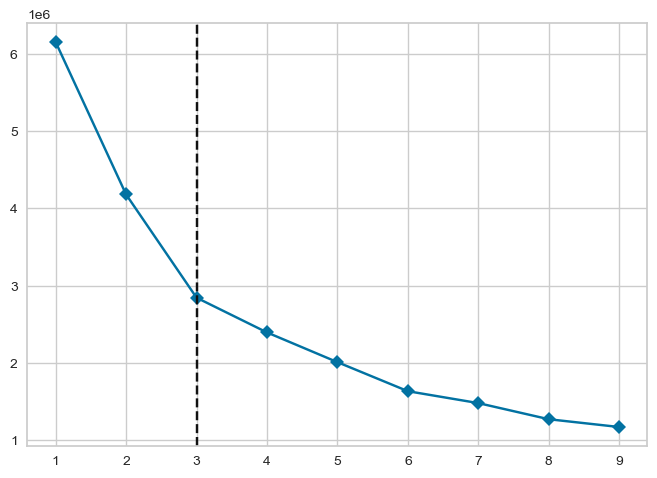

In [147]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Define the KMeans model first
model = KMeans(random_state=42)  # Adding random_state for reproducibility

# Now use the model in KElbowVisualizer
plot_model = KElbowVisualizer(model, k=(1,10), metric='distortion', timings=False)
plot_model.fit(scaled_data)

**Using calinski_harabasz metric**

/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=6, random_state=42),
                 k=(2, 7), metric='calinski_harabasz', timings=False)

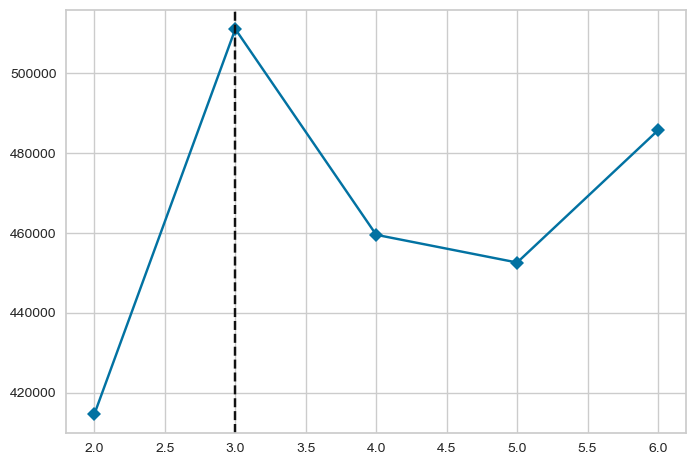

In [149]:
plot_model_2 = KElbowVisualizer(model, k=(2,7), metric='calinski_harabasz', timings=False)
plot_model_2.fit(scaled_data)

***Both distortion and calinski_harabasz metric suggested 3 clusters as the optimal number of cluster for the data***

## Cluster assignment

In [155]:
final_model = KMeans(random_state = 1, n_clusters = 3)
final_model.fit(scaled_data)

/Users/azeezoyedele/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [150]:
cluster_assignment = final_model.labels_
cluster_assignment

array([2, 0, 2, ..., 0, 1, 1], dtype=int32)

In [151]:
RFM_df["Cluster"] = cluster_assignment

In [152]:
RFM_df.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,Cluster
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,2
C1010012,69,1,1499.0,2,1,3,6,0
C1010014,76,2,1455.0,1,2,3,6,2
C1010018,37,1,30.0,4,1,1,6,1
C1010024,65,1,5000.0,2,1,4,7,0


**Visualize clusters**

<Axes: xlabel='recency', ylabel='monetary'>

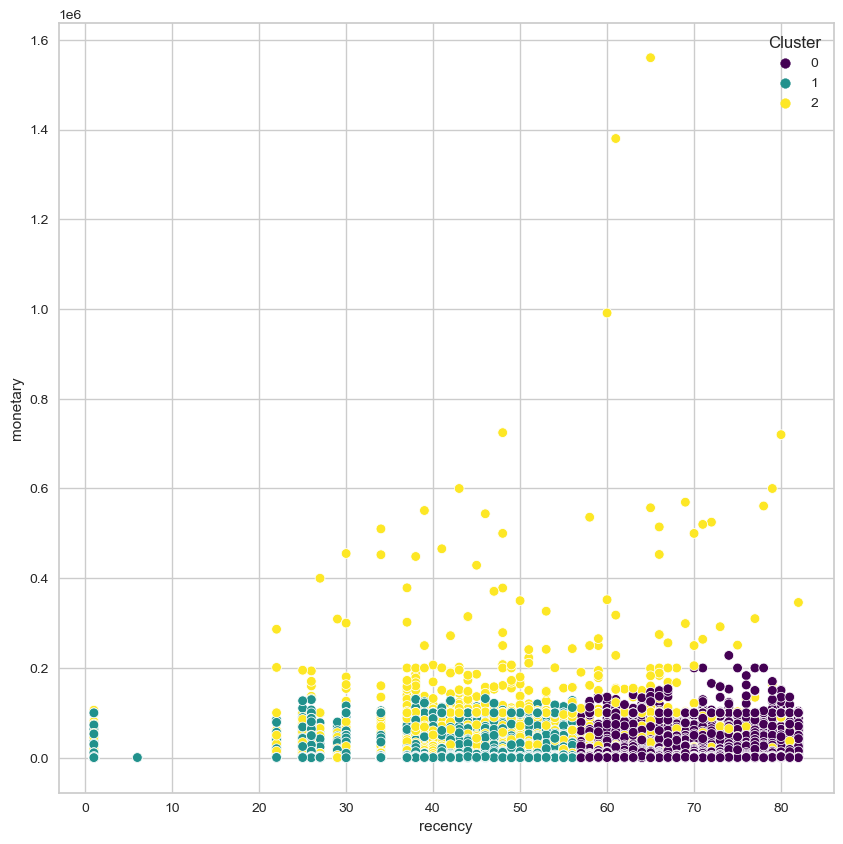

In [172]:
#visualize cluster distribution based on recency and monitary
plt.figure(figsize= (10,10))
sns.scatterplot(data=RFM_df, x="recency", y="monetary", hue="Cluster", palette='viridis')
# Changes made:

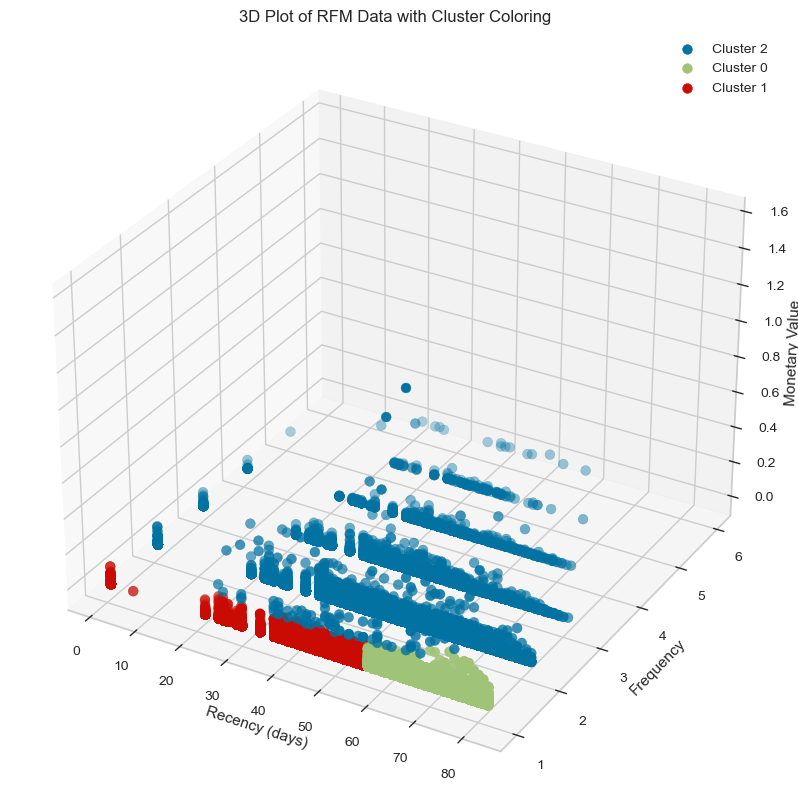

In [183]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different clusters
colors = ['b', 'g', 'r', 'y']

# Plot the RFM data points with different colors for each cluster
for cluster, color in zip(RFM_df["Cluster"].unique(), colors):
    cluster_data = RFM_df[RFM_df["Cluster"] == cluster]
    ax.scatter(cluster_data["recency"], cluster_data["frequency"], cluster_data["monetary"], c=color,s=50, marker='o', label=f'Cluster {cluster}')

# Set axis labels
ax.set_xlabel('Recency (days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

# Add a legend
ax.legend()

# Set the plot title
plt.title('3D Plot of RFM Data with Cluster Coloring')

# Show the plot
plt.show()

<Axes: xlabel='Cluster', ylabel='count'>

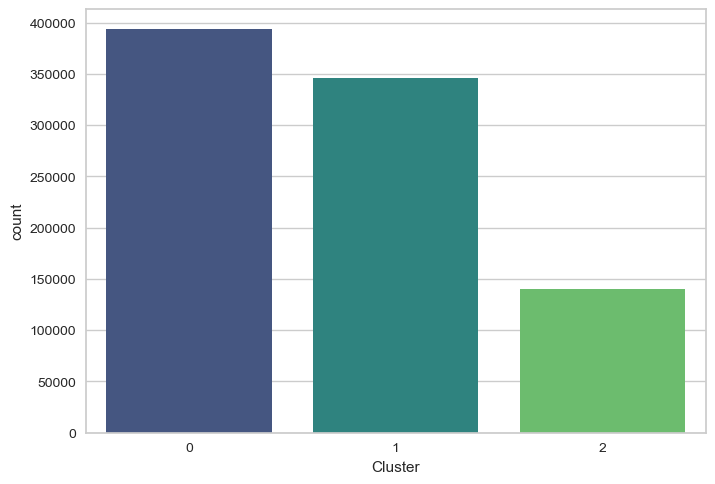

In [186]:
sns.countplot(x=RFM_df["Cluster"], palette= "viridis")

>Compared to the customer segments we created using the RFM score alone, the segments gotten from the k-means technique has more fair distribution of customers

In [199]:
#to oberserve descriptive statistics for each clusters
for cluster in RFM_df['Cluster'].unique():
    print(f"Cluster: {cluster}")
    print(RFM_df[RFM_df['Cluster'] == cluster].describe())

Cluster: 2
             recency      frequency      monetary        R_score  \
count  139814.000000  139814.000000  1.398140e+05  139814.000000   
mean       48.224577       2.144084  3.621687e+03       3.108165   
std        12.905761       0.394856  1.351224e+04       0.916134   
min         1.000000       1.000000  2.000000e+00       1.000000   
25%        40.000000       2.000000  6.793775e+02       2.000000   
50%        47.000000       2.000000  1.450000e+03       3.000000   
75%        57.000000       2.000000  3.076015e+03       4.000000   
max        82.000000       6.000000  1.560035e+06       4.000000   

             F_score        M_score      RFM_score   Cluster  
count  139814.000000  139814.000000  139814.000000  139814.0  
mean        2.142876       3.257285       8.508325       2.0  
std         0.387317       0.860861       1.359920       0.0  
min         1.000000       1.000000       5.000000       2.0  
25%         2.000000       3.000000       8.000000       2.0 

In [202]:
cluster_0 = RFM_df[RFM_df["Cluster"] == 0]
cluster_1 = RFM_df[RFM_df["Cluster"] == 1]
cluster_2 = RFM_df[RFM_df["Cluster"] == 2]

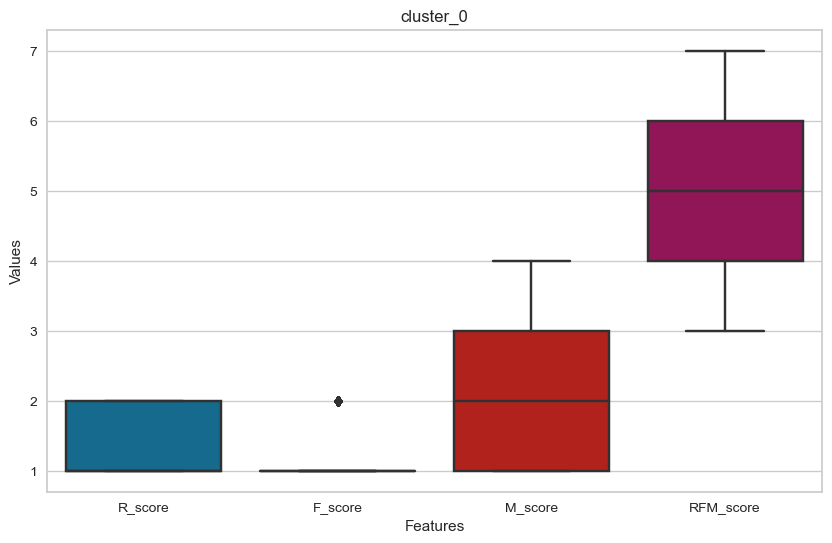

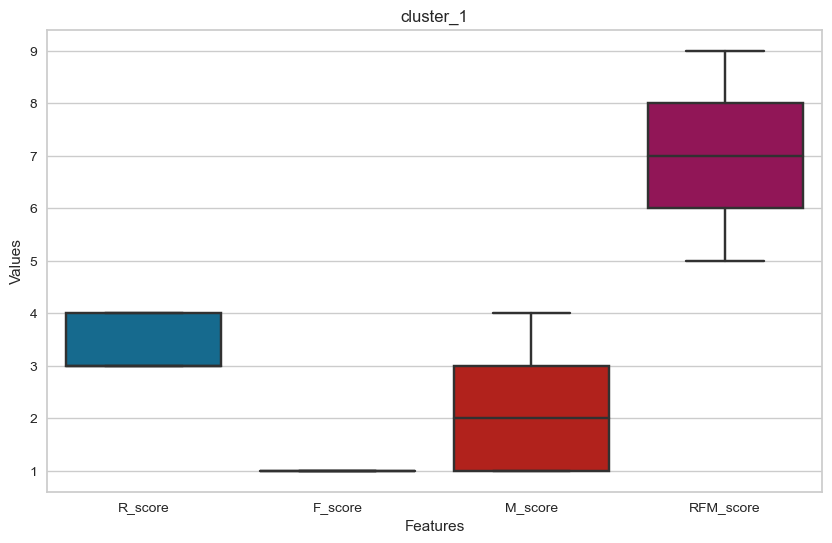

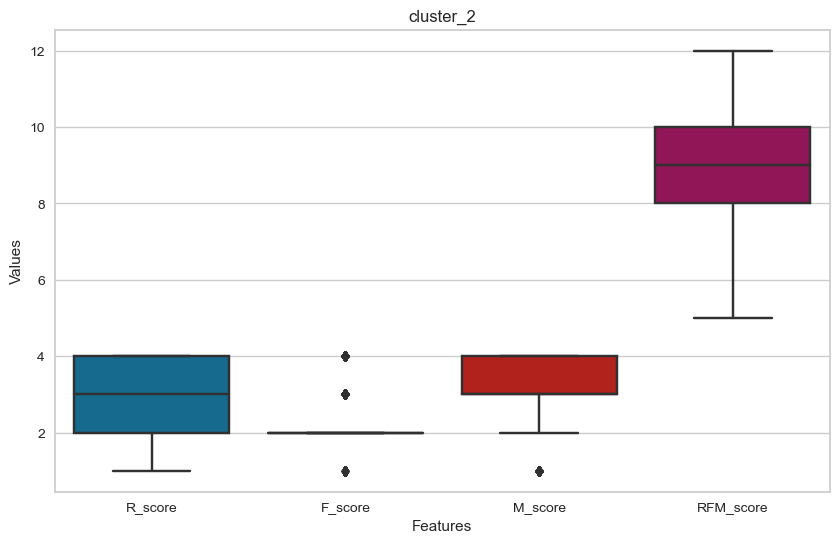

In [206]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=cluster_0[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"cluster_0")
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=cluster_1[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"cluster_1")
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()


plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=cluster_2[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"cluster_2")
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

**CLUSTER DESCRIPTION**

- **Cluster 0:**
     - ALL customers in this cluster have **Low Recency score** (1 to 2)
     - All customers have **low frequency score of 1** with a few outliers with 2 F-score
     - 50% of customers have monetary score are between 1 to 2 amd the other 50% has M-score from 2 to 4. The average M-score of this cluster is 2
     - 75% of customers have RFM_score between 4 to 7
       

- **Cluster 1:**
     - All customers have **very high recency score** between 3 to 4
     - All customers have **low frequency score** of 1
     - 50% of customers have monetary score are between 1 to 2 amd the other 50% has M-score from 2 to 4. The average M-score of this cluster is 2. Same as cluster 0
     - 75% of customers have RFM_score between 6 to 9

- **Cluster 2:**
     - 75% of customers have **high recency score** between 2 to 4 with average value of 3
     - All customers have **fairly high frequency score** of 2 with a few outliers having F-score of 1, 3 and 4
     - Almost all customers have **high monetary score** between 2 and 4 with a few outliers having an M-score of 1
     - 75% of customers have **high RFM score** between 8 to 12 and the remaining 25% have an RFM_score between 5 to 8

Cluster 2 has customers with better all round performance followed by cluster 1 and cluster 0 has customers with poor all round scores.